In [1]:
import sys
import lightgbm as lgb
sys.path.append('../')
from data import create_training_data, create_evaluation_data2, create_large_training_data
from pipeline import run_model_training, run_hyperparameter_tuning, run_model_training_quick, run_predictions

In [2]:
test_gw = 6

In [3]:
big_df = create_large_training_data()

create large training data version 0.2
season added is: 2020-21, in UTF-8!


..\data.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['season'] = season


season added is: 2019-20, in UTF-8!
season added is: 2018-19, in other!
season added is: 2017-18, in other!
season added is: 2016-17, in other!


..\data.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df.drop_duplicates(subset=["name", "round"], keep="first", inplace=True)


Creating shifted time-series features


..\data.py:387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['event_points'] = input_df['event_points'].shift(1)


training set made!


In [3]:
#df = create_training_data("2020-21")
eval_df = create_evaluation_data2(session="pred", gameweek_to_evaluate=test_gw)

create training data version 1.0 stable


..\data.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['event_points'] = input_df['event_points'].shift(1)


training set made!
test data version 0.4
The upcoming GW to predict for is 7


In [4]:
df

,name,ict_index,bps,now_cost,fdr,avg_minutes,ict_index_change,bps_change,event_points
0,Aaron Connolly,6.9,27,55,2,67.000000,3.5,30.0,1.0
1,Aaron Connolly,1.9,2,55,4,69.000000,-5.0,-25.0,8.0
2,Aaron Connolly,0.7,7,55,3,68.000000,-1.2,5.0,2.0
3,Aaron Connolly,3.0,13,55,3,56.800000,2.3,6.0,2.0
4,Aaron Connolly,0.0,0,55,2,47.333333,-3.0,-13.0,4.0
...,...,...,...,...,...,...,...,...,...
22158,Ã‡aglar SÃ¶yÃ¼ncÃ¼,2.3,13,53,2,41.161290,0.3,-12.0,6.0
22159,Ã‡aglar SÃ¶yÃ¼ncÃ¼,4.7,15,53,2,42.687500,2.4,2.0,2.0
22160,Ã‡aglar SÃ¶yÃ¼ncÃ¼,3.2,10,53,4,44.121212,-1.5,-5.0,2.0
22161,Ã‡aglar SÃ¶yÃ¼ncÃ¼,2.3,14,53,4,45.470588,-0.9,4.0,0.0


In [3]:
eval_df

,name,ict_index,bps,fdr,now_cost,avg_minutes,ict_index_change,bps_change,event_points
0,Leno,0.0,0,2,49,67.50,-4.3,-20.0,0
1,Rúnarsson,0.0,0,2,40,0.00,0.0,0.0,0
2,Willian,0.0,0,2,63,0.00,0.0,0.0,0
3,Aubameyang,16.1,30,2,99,44.25,16.0,30.0,2
4,Cédric,2.5,5,2,44,47.00,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...
594,Cutrone,0.0,0,2,50,0.00,0.0,0.0,0
595,Cundle,0.0,0,2,45,0.00,0.0,0.0,0
596,Campbell,0.0,0,2,45,0.00,0.0,0.0,0
597,Marques,0.0,0,2,40,0.00,0.0,0.0,0


In [ ]:
best_hyperparams = run_hyperparameter_tuning(df)

In [4]:
import pickle
params = pickle.load(open("parameters_2021_23_09_13_25.pkl",'rb'))

In [6]:
params

{'n_estimators': 10000,
 'learning_rate': 0.0496360606281236,
 'num_leaves': 2700,
 'max_depth': 3,
 'min_data_in_leaf': 200,
 'max_bin': 215,
 'lambda_l1': 15,
 'lambda_l2': 5,
 'min_gain_to_split': 5.4632620160550855,
 'bagging_fraction': 0.2,
 'bagging_freq': 1,
 'feature_fraction': 0.5}

In [ ]:
model = run_model_training(params, df)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

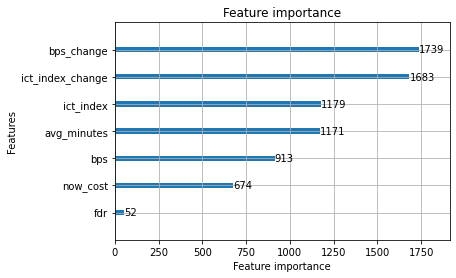

In [8]:
lgb.plot_importance(model[0])

In [5]:
used_features =  ['name', 'ict_index', 'bps', 'now_cost','avg_minutes', 'fdr','ict_index_change', 'bps_change']

In [8]:
preds = run_predictions(eval_df, "model_2021_23_09_13_27.pkl", session = "test", test_gw=test_gw, used_features=used_features)

Saving model...


In [9]:
preds.sort_values(by=["predicted_points"], ascending=False).head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,fdr,ict_index_change,bps_change,predicted_points,actual_gw_points,round
0,Sarr,8.8,23,62,45.000000,3,-10.8,-18.0,13.405222,0,6
1,Sarr,8.8,23,62,45.000000,3,-10.8,-18.0,13.405222,9,6
2,Toney,7.5,19,63,90.000000,4,-3.8,-27.0,11.156638,5,6
3,van Dijk,4.1,19,66,90.000000,4,-1.9,-22.0,10.924759,1,6
4,Azpilicueta,3.3,15,60,75.333333,2,-1.7,-17.0,9.853191,2,6
5,Salah,9.8,19,126,90.000000,4,-9.9,-10.0,9.715899,7,6
6,Mané,5.5,7,119,90.000000,4,-4.7,-18.0,9.707353,2,6
7,Rüdiger,4.6,9,56,90.000000,2,-5.3,-31.0,9.551511,1,6
8,Thiago Silva,1.9,11,54,47.666667,2,-10.5,-35.0,9.321211,2,6
9,Alonso,2.0,7,58,89.166667,2,-15.3,-26.0,8.703035,1,6


In [15]:
preds.sort_values(by=["actual_gw_points"], ascending=False).head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,fdr,ict_index_change,bps_change,predicted_points,actual_gw_points,round
185,Thiago Silva,5.3,30,54,33.750000,4,2.2,21.0,1.770638,15,5
120,Sarr,2.5,3,60,45.000000,2,-9.2,-2.0,2.693996,15,5
265,Cash,3.2,13,50,90.000000,4,0.9,6.0,0.835405,15,5
122,Sarr,2.5,3,60,45.000000,2,-9.2,-2.0,2.693996,15,5
358,Rüdiger,1.8,24,55,90.000000,4,0.0,16.0,0.094533,14,5
35,Salah,17.7,28,125,90.000000,2,3.7,1.0,7.114421,12,5
53,Toney,5.5,15,64,90.000000,3,-2.4,-7.0,5.751828,12,5
60,van Dijk,5.0,27,65,90.000000,2,1.2,7.0,5.218528,12,5
272,Ødegaard,3.9,14,55,53.333333,2,3.8,9.0,0.763252,11,5
147,Benrahma,5.9,13,64,81.500000,4,1.2,3.0,2.259322,10,5


In [11]:
preds.head(n = 30)

,name,ict_index,bps,now_cost,avg_minutes,ict_index_change,bps_change,predicted_points,actual_gw_points,round
0,Alexander-Arnold,13.3,24,75,90.000000,-4.9,-26.0,13.844529,12,4
1,Antonio,21.2,46,78,89.333333,0.6,-21.0,13.524052,-1,4
2,Lukaku,7.1,6,115,60.000000,-13.6,-27.0,12.641775,13,4
3,Benrahma,4.7,10,63,88.000000,-7.0,-33.0,12.073288,3,4
4,Duffy,2.9,14,41,90.000000,-8.5,-23.0,11.243941,5,4
5,Tsimikas,1.8,4,42,61.333333,-8.1,-37.0,11.091711,0,4
6,Laporte,7.7,23,55,60.000000,-0.4,-15.0,10.309993,5,4
7,Rice,5.4,11,50,90.000000,-2.3,-23.0,9.834561,2,4
8,Klich,0.0,0,55,49.666667,-10.2,-28.0,9.808517,0,4
9,Mings,0.0,0,50,60.000000,-8.3,-47.0,9.756328,0,4
